<a href="https://colab.research.google.com/github/LobarBadalova/tensorflow_practices/blob/master/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

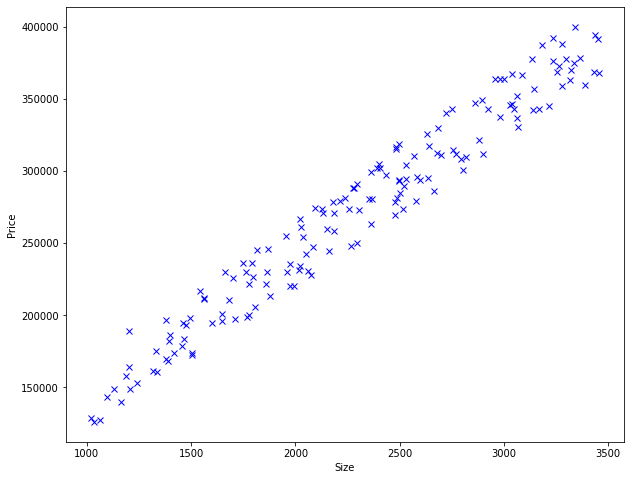

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support

#  generation some house sizes between 1000 and 3500 (typical sq ft of house)
num_house = 160
np.random.seed(42)
house_size = np.random.randint(low=1000, high=3500, size=num_house )

# Generate house prices from house size with a random noise added.
np.random.seed(42)
house_price = house_size * 100.0 + np.random.randint(low=20000, high=70000, size=num_house)  

# Plot generated house and size 
plt.plot(house_size, house_price, "bx")  # bx = blue x
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [0]:


# you need to normalize values to prevent under/overflows.
def normalize(array):
    return (array - array.mean()) / array.std()

# define number of training samples, 0.7 = 70%.  We can take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_size[:num_train_samples])
train_price = np.asanyarray(house_price[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_size[num_train_samples:])
test_house_price = np.array(house_price[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)


In [0]:


#  Set up the TensorFlow placeholders that get updated as we descend down the gradient
tf_house_size = tf.placeholder("float", name="house_size")
tf_price = tf.placeholder("float", name="price")

# Define the variables holding the size_factor and price we set during training.  
# We initialize them to some random values based on the normal distribution.
tf_size_factor = tf.Variable(np.random.randn(), name="size_factor")
tf_price_offset = tf.Variable(np.random.randn(), name="price_offset")


# 2. Define the operations for the predicting values - predicted price = (size_factor * house_size ) + price_offset
#  Notice, the use of the tensorflow add and multiply functions.  These add the operations to the computation graph,
#  AND the tensorflow methods understand how to deal with Tensors.  Therefore do not try to use numpy or other library 
#  methods.
tf_price_pred = tf.add(tf.multiply(tf_size_factor, tf_house_size), tf_price_offset)


# 3. Define the Loss Function (how much error) - Mean squared error
tf_cost = tf.reduce_sum(tf.pow(tf_price_pred-tf_price, 2))/(2*num_train_samples)


# Optimizer learning rate.  The size of the steps down the gradient
learning_rate = 0.1

# 4. define a Gradient descent optimizer that will minimize the loss defined in the operation "cost".
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

# Initializing the variables
init = tf.global_variables_initializer()


iteration #: 0002 cost= 1.326728344 size_factor= -0.16155772 price_offset= -1.1449335
iteration #: 0004 cost= 0.895426333 size_factor= 0.04569737 price_offset= -0.93716747
iteration #: 0006 cost= 0.606481731 size_factor= 0.21534 price_offset= -0.7670929
iteration #: 0008 cost= 0.412913054 size_factor= 0.3541961 price_offset= -0.62787116
iteration #: 0010 cost= 0.283243448 size_factor= 0.46785265 price_offset= -0.5139054
iteration #: 0012 cost= 0.196383253 size_factor= 0.5608829 price_offset= -0.420614
iteration #: 0014 cost= 0.138202906 size_factor= 0.6370295 price_offset= -0.3442464
iteration #: 0016 cost= 0.099235289 size_factor= 0.6993576 price_offset= -0.28173256
iteration #: 0018 cost= 0.073138192 size_factor= 0.7503748 price_offset= -0.23055942
iteration #: 0020 cost= 0.055662550 size_factor= 0.7921331 price_offset= -0.18866932
iteration #: 0022 cost= 0.043961689 size_factor= 0.8263131 price_offset= -0.15437834
iteration #: 0024 cost= 0.036128599 size_factor= 0.85429037 price_off

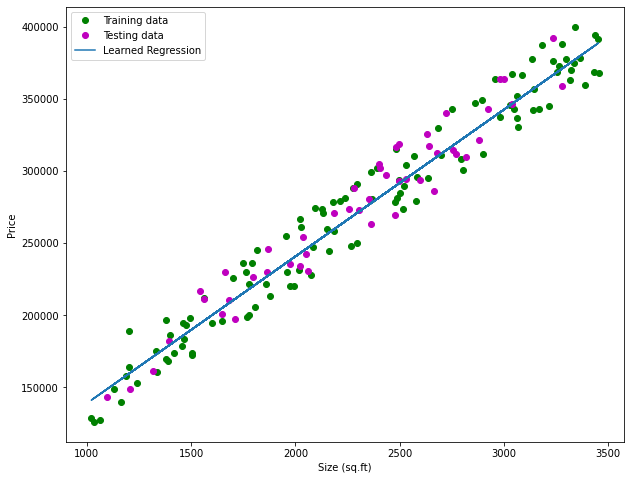

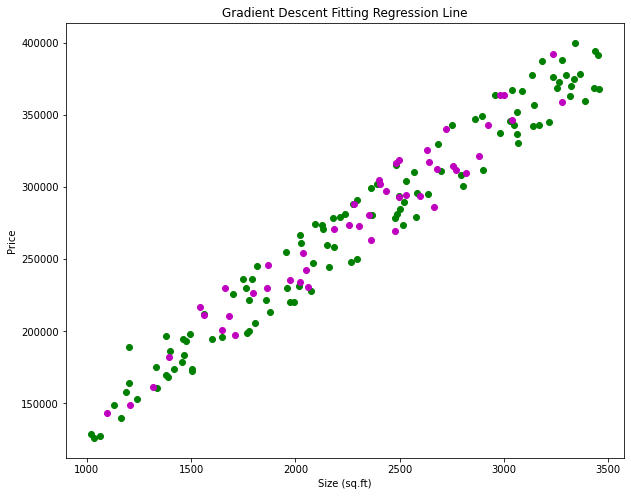

In [0]:
# Launch the graph in the session
with tf.Session() as sess:
    sess.run(init)

    # set how often to display training progress and number of training iterations
    display_every = 2
    num_training_iter = 50

    # calculate the number of lines to animation
    fit_num_plots = math.floor(num_training_iter/display_every)
    # add storage of factor and offset values from each epoch
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offsets = np.zeros(fit_num_plots)
    fit_plot_idx = 0    

   # keep iterating the training data
    for iteration in range(num_training_iter):

        # Fit all training data
        for (x, y) in zip(train_house_size_norm, train_price_norm):
            sess.run(optimizer, feed_dict={tf_house_size: x, tf_price: y})

        # Display current status
        if (iteration + 1) % display_every == 0:
            c = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price:train_price_norm})
            print("iteration #:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(c), \
                "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset))
            # Save the fit size_factor and price_offset to allow animation of learning process
            fit_size_factor[fit_plot_idx] = sess.run(tf_size_factor)
            fit_price_offsets[fit_plot_idx] = sess.run(tf_price_offset)
            fit_plot_idx = fit_plot_idx + 1

    print("Optimization Finished!")
    training_cost = sess.run(tf_cost, feed_dict={tf_house_size: train_house_size_norm, tf_price: train_price_norm})
    print("Trained cost=", training_cost, "size_factor=", sess.run(tf_size_factor), "price_offset=", sess.run(tf_price_offset), '\n')


   # Plot of training and test data, and learned regression
    
    # get values used to normalized data so we can denormalize data back to its original scale
    train_house_size_mean = train_house_size.mean()
    train_house_size_std = train_house_size.std()

    train_price_mean = train_price.mean()
    train_price_std = train_price.std()

    # Plot the graph
    plt.rcParams["figure.figsize"] = (10,8)
    plt.figure()
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')
    plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean,
             (sess.run(tf_size_factor) * train_house_size_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,
             label='Learned Regression')
 
    plt.legend(loc='upper left')
    plt.show()



    # 
    # Plot another graph that animation of how Gradient Descent sequentually adjusted size_factor and price_offset to 
    # find the values that returned the "best" fit line.
    fig, ax = plt.subplots()
    line, = ax.plot(house_size, house_price)

    plt.rcParams["figure.figsize"] = (10,8)
    plt.title("Gradient Descent Fitting Regression Line")
    plt.ylabel("Price")
    plt.xlabel("Size (sq.ft)")
    plt.plot(train_house_size, train_price, 'go', label='Training data')
    plt.plot(test_house_size, test_house_price, 'mo', label='Testing data')

    def animate(i):
        line.set_xdata(train_house_size_norm * train_house_size_std + train_house_size_mean)  # update the data
        line.set_ydata((fit_size_factor[i] * train_house_size_norm + fit_price_offsets[i]) * train_price_std + train_price_mean)  # update the data
        return line,
 
     # Init only required for blitting to give a clean slate.
    def initAnim():
        line.set_ydata(np.zeros(shape=house_price.shape[0])) # set y's to 0
        return line,

    ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, fit_plot_idx), init_func=initAnim,
                                 interval=1000, blit=True)

    plt.show()   